In [ ]:
import pandas as pd

df1 = pd.read_excel('f_029df.xlsx')
df2 = pd.read_excel('f_9218df.xlsx')
df3 = pd.read_excel('f_18224df.xlsx')


In [ ]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,dong,X,Y,highway,ffnc,ffc,nfnc,nfc,fsnc,fsc,nsnc,nsc,총생활인구수,affnc,affc,anfnc,anfc,afsnc,afsc,ansnc,ansc
0,0,0,가락1동,127.108235,37.495329,0.0,0.225806,0.000000,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.322362,0.077419,0.000000,0.00,0.000000,0.047561,0.022764,0.012,0.034783
1,1,1,가락2동,127.130643,37.495860,0.0,0.161290,0.166667,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.320622,0.038710,0.033333,0.01,0.033333,0.056098,0.043902,0.064,0.130435
2,2,2,가락본동,127.121640,37.497217,0.0,0.032258,0.000000,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.445918,0.045161,0.033333,0.01,0.033333,0.040244,0.040650,0.064,0.078261
3,3,3,가리봉동,126.888257,37.482555,0.0,0.032258,0.000000,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.108998,0.283871,0.000000,0.08,0.233333,0.293902,0.034146,0.392,0.234783
4,4,4,가산동,126.884341,37.476835,0.0,1.000000,0.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.562965,0.335484,0.000000,0.12,0.233333,0.343902,0.058537,0.408,0.286957


In [3]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1 = df1.drop('Unnamed: 0.1', axis = 1)
df1 = df1.drop('X', axis = 1)
df1 = df1.drop('Y', axis = 1)

df2 = df2.drop('Unnamed: 0', axis = 1)
df2 = df2.drop('Unnamed: 0.1', axis = 1)
df2 = df2.drop('X', axis = 1)
df2 = df2.drop('Y', axis = 1)

df3 = df3.drop('Unnamed: 0', axis = 1)
df3 = df3.drop('Unnamed: 0.1', axis = 1)
df3 = df3.drop('X', axis = 1)
df3 = df3.drop('Y', axis = 1)

In [4]:
# 총생활인구수를 마지막 칼럼에 위치하게 끔하겠습니다.
# 먼저 a로 총생활인구수 값들을 받아줍니다.
a = df2['총생활인구수'].values
type(a)

numpy.ndarray

In [5]:
# 총생활인구수 칼럼을 drop 시키고 population이라는 column을 추가합니다.
df2 = df2.drop('총생활인구수', axis = 1)
df2['population'] = a

In [6]:
df2.head()

,dong,highway,ffnc,ffc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,affc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population
0,가락1동,NaN,0.225806,0.000000,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.000000,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581
1,가락2동,NaN,0.161290,0.166667,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.033333,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967
2,가락본동,NaN,0.032258,0.000000,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.033333,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574
3,가리봉동,NaN,0.032258,0.000000,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.000000,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857
4,가산동,NaN,1.000000,0.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.000000,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785


In [7]:
# 전에 heatmap을 그린거 보면 ffc는 데이터가 너무 없어서 -값 내지는 매우 작은값을 보였다.
# 머신러닝돌릴때 ffc와 affc도 drop하자.
df2 = df2.drop('ffc', axis = 1)
df2 = df2.drop('affc', axis = 1)

In [8]:
# null값을 0으로 채워둡니다.
df2  = df2.fillna(0)

In [9]:
# 다중선형회귀 돌리기
# 먼저 데이터 셋을 트레인 셋과 test set으로 분리시키자.
from sklearn.model_selection import train_test_split
seed = 316
data = df2.values
x = data[:,1:16]
y = data[:,16]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = seed)


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

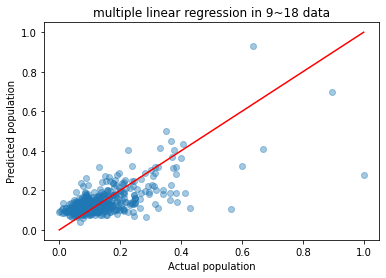

In [13]:
y_predict = lin_reg.predict(x)

import matplotlib.pyplot as plt
plt.scatter(y, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("multiple linear regression in 9~18 data")
plt.savefig('LR_9~18.jpg')
plt.show()
# feature가 너무 많아서 오차가 많이 발생하는 것 같습니다.

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np
predictions = lin_reg.predict(x_test)
Lin_mse = mean_squared_error(y_test, predictions) # (실제값, 핏팅값)
Lin_rmse = np.sqrt(Lin_mse)
print('test error:',Lin_rmse)

0.08978409730993109


In [21]:
list_y = y.tolist()
list_predicty = []

for i in range(len(list_y)):
    list_predicty.append(y_predict[i].item())
diff = []
for i in range(len(list_y)):
    diff.append(list_y[i] - list_predicty[i])
diff


[-0.0482335370313666,
 0.020584395085101043,
 0.10575016997552394,
 -0.07998443005110932,
 -0.2934384766999014,
 0.036420224989982375,
 -0.02894660423007686,
 -0.07339349788700147,
 -0.07435800463446306,
 0.05838674725418487,
 0.013905418803950478,
 0.11024553633320547,
 0.053615885127845125,
 -0.003719137678901474,
 -0.03281842190739512,
 -0.07124101772760537,
 0.019639659357994305,
 -0.06044296606418108,
 -0.04247033894967361,
 -0.16589312131992343,
 -0.031133254743953953,
 -0.04240282652860557,
 -0.0562045783207277,
 -0.04962427534093217,
 0.06556249964162453,
 0.04838350632118377,
 -0.08608221315682857,
 0.029698996286684737,
 0.02057983095327623,
 0.039910544562334754,
 -0.08204464601432446,
 -0.06715059164081591,
 0.0846930585378011,
 -0.024930263231201566,
 -0.053034345887923856,
 -0.035454969615537874,
 0.016095704136049438,
 0.027502311236060742,
 0.027368209164343363,
 -0.06999457050307309,
 0.019412658360797683,
 -0.01010408598600493,
 -0.07308454557426924,
 -0.0179404323496

In [28]:
df2['diff'] = diff

df2_sort = df2.sort_values(by = df2.columns[-1], ascending= False )

In [30]:
df2_sort

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population,diff
278,역삼1동,0.00,0.129032,0.05,0.000000,0.103659,0.211382,0.36,0.173913,0.058065,0.15,0.033333,0.060976,0.167480,0.164,0.252174,1.000000,0.724462
187,서교동,0.00,0.000000,0.00,0.000000,0.006098,0.073171,0.06,0.000000,0.032258,0.04,0.000000,0.017073,0.048780,0.032,0.078261,0.564476,0.459361
261,신촌동,0.00,0.000000,0.15,0.000000,0.079268,0.000000,0.22,0.000000,0.012903,0.05,0.100000,0.032927,0.029268,0.064,0.017391,0.428560,0.316779
193,서초3동,0.25,0.225806,0.05,0.000000,0.231707,0.284553,0.14,0.521739,0.109677,0.05,0.000000,0.081707,0.089431,0.116,0.200000,0.598984,0.276727
353,종로1.2.3.4가동,0.00,0.290323,0.15,0.166667,0.378049,0.000000,0.12,0.391304,0.270968,0.17,0.033333,0.081707,0.008130,0.160,0.095652,0.670800,0.263786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,거여2동,0.00,0.064516,0.05,0.000000,0.000000,0.081301,0.94,0.086957,0.077419,0.08,0.133333,0.019512,0.056911,0.284,0.121739,0.070061,-0.165893
259,신정6동,0.00,0.064516,0.30,0.000000,0.310976,0.065041,0.24,0.000000,0.038710,0.13,0.066667,0.106098,0.123577,0.072,0.060870,0.086493,-0.175043
208,세곡동,1.00,0.354839,0.40,0.500000,0.292683,0.227642,0.08,0.608696,0.167742,0.09,0.100000,0.126829,0.095935,0.112,0.139130,0.226268,-0.176707
117,묵1동,0.00,0.129032,0.05,0.000000,0.030488,0.203252,0.76,0.695652,0.038710,0.08,0.000000,0.051220,0.087805,0.172,0.400000,0.130530,-0.185539


In [31]:
df2_sort.to_excel('lsit_MLR_9218.xlsx')

In [32]:
df1['population'] = (df1['총생활인구수'] + df3['총생활인구수'])/2
df1 = df1.drop('총생활인구수', axis = 1)

In [33]:
df1 = df1.drop(columns=['nfnc','nfc','nsnc','nsc','anfnc','anfc','ansnc','ansc'])

In [34]:
df1.head()

,dong,highway,ffnc,ffc,fsnc,fsc,affnc,affc,afsnc,afsc,population
0,가락1동,0.0,0.225806,0.000000,0.164634,0.000000,0.077419,0.000000,0.047561,0.022764,0.299870
1,가락2동,0.0,0.161290,0.166667,0.024390,0.016260,0.038710,0.033333,0.056098,0.043902,0.303859
2,가락본동,0.0,0.032258,0.000000,0.146341,0.154472,0.045161,0.033333,0.040244,0.040650,0.426756
3,가리봉동,0.0,0.032258,0.000000,0.006098,0.000000,0.283871,0.000000,0.293902,0.034146,0.105551
4,가산동,0.0,1.000000,0.000000,1.000000,0.065041,0.335484,0.000000,0.343902,0.058537,0.549815


In [38]:
from sklearn.model_selection import train_test_split
seed = 316
data = df1.values
x = data[:,1:-1]
y = data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = seed)


In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

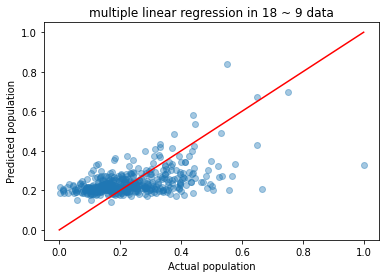

In [41]:
y_predict = lin_reg.predict(x)

import matplotlib.pyplot as plt
plt.scatter(y, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("multiple linear regression in 18 ~ 9 data")
plt.savefig('LR_18~9.jpg')
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np
predictions = lin_reg.predict(x_test)
Lin_mse = mean_squared_error(y_test, predictions) # (실제값, 핏팅값)
Lin_rmse = np.sqrt(Lin_mse)
print('test error:',Lin_rmse)

test error: 0.11627348324542483


In [43]:
list_y = y.tolist()
list_predicty = []

for i in range(len(list_y)):
    list_predicty.append(y_predict[i].item())
diff = []
for i in range(len(list_y)):
    diff.append(list_y[i] - list_predicty[i])
diff

[-0.006867539421480773,
 0.07402560462121571,
 0.13619294873161752,
 -0.04482143413025802,
 -0.2883041126392366,
 0.04178407333875889,
 -0.05236238513769961,
 -0.10253876834067482,
 -0.19130322527477833,
 0.06903529067362202,
 0.029370448450127984,
 0.22332642954653867,
 0.0853122362183249,
 0.005998533385609572,
 -0.07155655217017798,
 -0.1361582264805713,
 0.028668901087673365,
 -0.06976668158045038,
 -0.08540521731048262,
 -0.06252274376041186,
 -0.040232069784452484,
 -0.10989422865847129,
 -0.030516386073511537,
 -0.06149176225000558,
 0.15205966860698944,
 0.18324694531300495,
 0.03886994716673614,
 0.11778997247211243,
 0.08366255477507012,
 -0.04644318890792068,
 -0.17865137307564607,
 -0.07472865284951793,
 0.10530894751412162,
 -0.11019830435635225,
 -0.03320510752716013,
 0.03748624253717031,
 0.04004540061996742,
 0.11324086819028853,
 0.03007126154415493,
 -0.0028629833273013383,
 -0.020025348904902762,
 -0.040536543244794804,
 -0.08119173777802183,
 -0.11496037433478998,


In [44]:
df1['diff'] = diff

df1_sort = df1.sort_values(by = df1.columns[-1], ascending= False )

In [45]:
df1_sort

,dong,highway,ffnc,ffc,fsnc,fsc,affnc,affc,afsnc,afsc,population,diff
278,역삼1동,0.00,0.129032,0.000000,0.103659,0.211382,0.058065,0.000000,0.060976,0.167480,1.000000,0.673212
187,서교동,0.00,0.000000,0.000000,0.006098,0.073171,0.032258,0.000000,0.017073,0.048780,0.666805,0.459346
408,화곡1동,0.00,0.032258,0.000000,0.000000,0.048780,0.064516,0.000000,0.010976,0.066667,0.556467,0.352436
175,상계6.7동,0.00,0.096774,0.000000,0.012195,0.024390,0.141935,0.000000,0.046341,0.026016,0.504960,0.303094
289,오류2동,0.00,0.161290,0.166667,0.067073,0.121951,0.038710,0.033333,0.032927,0.043902,0.567983,0.295392
...,...,...,...,...,...,...,...,...,...,...,...,...
116,무악동,0.00,0.032258,0.000000,0.042683,0.056911,0.051613,0.000000,0.030488,0.108943,0.031432,-0.199502
87,돈암2동,0.00,0.032258,0.000000,0.073171,0.390244,0.019355,0.000000,0.053659,0.120325,0.128691,-0.203560
347,정릉1동,0.25,0.032258,0.000000,0.170732,0.081301,0.019355,0.000000,0.054878,0.203252,0.119660,-0.208947
90,둔촌1동,0.50,0.000000,0.000000,0.000000,0.000000,0.077419,0.000000,0.012195,0.016260,0.002422,-0.216773


In [47]:
df1_sort.to_excel('list_MLR_1829.xlsx')

In [51]:
df1['mean_diff'] = (df1['diff'] + df2['diff'])/2

In [62]:
df1 = df1.drop(columns=['diff'] )
df1 = df1.drop(columns=['highway'] )
df1 = df1.drop(columns=['ffnc'] )
df1 = df1.drop(columns=['ffc'] )
df1 = df1.drop(columns=['fsnc'] )
df1 = df1.drop(columns=['fsc'] )
df1 = df1.drop(columns=['affc'] )
df1 = df1.drop(columns=['afsnc'] )
df1 = df1.drop(columns=['afsc'] )

In [64]:
df1 = df1.drop(columns=['affnc'] )

In [65]:
df1

,dong,population,mean_diff
0,가락1동,0.299870,-0.027551
1,가락2동,0.303859,0.047305
2,가락본동,0.426756,0.120972
3,가리봉동,0.105551,-0.062403
4,가산동,0.549815,-0.290871
...,...,...,...
419,효창동,0.077963,-0.114372
420,후암동,0.125497,-0.058352
421,휘경1동,0.163312,-0.053611
422,휘경2동,0.199314,-0.045637


In [66]:
df1_sort = df1.sort_values(by = df1.columns[-1], ascending= False )

In [67]:
df1_sort

,dong,population,mean_diff
278,역삼1동,1.000000,0.698837
187,서교동,0.666805,0.459354
261,신촌동,0.500452,0.298193
408,화곡1동,0.556467,0.254862
193,서초3동,0.647968,0.248700
...,...,...,...
90,둔촌1동,0.002422,-0.154630
116,무악동,0.031432,-0.162258
347,정릉1동,0.119660,-0.174617
259,신정6동,0.179144,-0.175683


In [69]:
df1_sort.to_excel('list_MLR_maen.xlsx')